# Zomato Data Analysis 

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading data

In [106]:
path='C:/Users/sreeh/DA Portfolio Projects/Python/DA_Portfolio Project/Zomato Project/zomato.csv'
df=pd.read_csv(path)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
df.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


## Understanding the structure of data

In [107]:
df.shape

(51717, 17)

In [108]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

## Dropping Unwanted Columns

In [109]:
df=df.drop(['url', 'address', 'phone', 'reviews_list', 'menu_item','dish_liked'],axis=1)
df.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
 10  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


## Dropping Duplicates

In [111]:
df=df.drop_duplicates()
df.shape

(51609, 11)

In [112]:
df.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari


In [113]:
#Dropping the column 'listed_in(city)' as it is similar to location
df.drop(['listed_in(city)'],axis=1,inplace=True)
df.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet


## Renaming column headers

In [114]:
df.rename(columns={'approx_cost(for two people)':'cost_for_2','listed_in(type)':'type'},inplace=True)
df.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_for_2,type
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet


## Analysing and Manipulating column values

In [115]:
df['online_order'].unique()

array(['Yes', 'No'], dtype=object)

In [116]:
df['book_table'].unique()

array(['Yes', 'No'], dtype=object)

In [117]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [118]:
def rate_clean(rate):
    if(rate == '-' or rate=='NEW'):
        return np.nan
    else:
        rate = str(rate).split('/')[0]
        return(float(rate))
df['rate']=df['rate'].apply(rate_clean)   
df['rate'].head(2)

0    4.1
1    4.1
Name: rate, dtype: float64

## Handling null values

In [119]:
df['rate'].fillna(df['rate'].mean(),inplace=True)
df['rate'].isnull().sum()

0

In [120]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51609 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          51609 non-null  object 
 1   online_order  51609 non-null  object 
 2   book_table    51609 non-null  object 
 3   rate          51609 non-null  float64
 4   votes         51609 non-null  int64  
 5   location      51588 non-null  object 
 6   rest_type     51382 non-null  object 
 7   cuisines      51564 non-null  object 
 8   cost_for_2    51265 non-null  object 
 9   type          51609 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 4.3+ MB


(51609, 10)

In [121]:
# Dropping the other nulls as they don't make much difference

In [122]:
df.dropna(inplace=True)
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51042 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          51042 non-null  object 
 1   online_order  51042 non-null  object 
 2   book_table    51042 non-null  object 
 3   rate          51042 non-null  float64
 4   votes         51042 non-null  int64  
 5   location      51042 non-null  object 
 6   rest_type     51042 non-null  object 
 7   cuisines      51042 non-null  object 
 8   cost_for_2    51042 non-null  object 
 9   type          51042 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 4.3+ MB


(51042, 10)

In [123]:
df.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_for_2,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet


In [124]:
#Checking values and manipulating the rest of columns

In [125]:
df['votes'].unique()

array([ 775,  787,  918, ..., 4957, 2382,  843], dtype=int64)

In [126]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'RT Nagar', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura',
       'Jeeva

In [127]:
df['location'].value_counts()

BTM                              5056
HSR                              2494
Koramangala 5th Block            2479
JP Nagar                         2218
Whitefield                       2105
Indiranagar                      2026
Jayanagar                        1916
Marathahalli                     1805
Bannerghatta Road                1609
Bellandur                        1268
Electronic City                  1246
Koramangala 1st Block            1236
Brigade Road                     1210
Koramangala 7th Block            1174
Koramangala 6th Block            1127
Sarjapur Road                    1047
Koramangala 4th Block            1017
Ulsoor                           1011
Banashankari                      902
MG Road                           893
Kalyan Nagar                      841
Richmond Road                     803
Malleshwaram                      721
Frazer Town                       714
Basavanagudi                      684
Residency Road                    671
Brookefield 

In [128]:
#Since we have locations with very less counts, we are grouping then together as 'Others'
locations=df['location'].value_counts()
location_count_less=locations[locations<300]
def change_location(location):
    if location in location_count_less:
        return 'Others'
    else:
        return location
df['location']=df['location'].apply(change_location)
df['location'].value_counts()

BTM                      5056
Others                   4954
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
Indiranagar              2026
Jayanagar                1916
Marathahalli             1805
Bannerghatta Road        1609
Bellandur                1268
Electronic City          1246
Koramangala 1st Block    1236
Brigade Road             1210
Koramangala 7th Block    1174
Koramangala 6th Block    1127
Sarjapur Road            1047
Koramangala 4th Block    1017
Ulsoor                   1011
Banashankari              902
MG Road                   893
Kalyan Nagar              841
Richmond Road             803
Malleshwaram              721
Frazer Town               714
Basavanagudi              684
Residency Road            671
Brookefield               656
New BEL Road              644
Banaswadi                 640
Kammanahalli              639
Rajajinagar               591
Church Street             566
Lavelle Ro

In [129]:
df['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', 'Dhaba', 'Quick Bites, Sweet Shop',
       'Microbrewery', 'Food Court, Quick Bites', 'Pub, Bar',
       'Casual Dining, Pub', 'Lounge, Ba

In [130]:
df['rest_type'].value_counts()

Quick Bites                      19010
Casual Dining                    10253
Cafe                              3682
Delivery                          2574
Dessert Parlor                    2242
Takeaway, Delivery                2008
Bakery                            1140
Casual Dining, Bar                1130
Beverage Shop                      863
Bar                                686
Food Court                         616
Sweet Shop                         468
Bar, Casual Dining                 411
Lounge                             395
Pub                                355
Fine Dining                        345
Casual Dining, Cafe                311
Beverage Shop, Quick Bites         293
Bakery, Quick Bites                286
Mess                               264
Pub, Casual Dining                 255
Sweet Shop, Quick Bites            178
Kiosk                              176
Dessert Parlor, Cafe               175
Cafe, Casual Dining                173
Cafe, Bakery             

In [131]:
#Since we have many rest_types with very less counts, we are grouping then together as 'Others'
rest_type_count = df['rest_type'].value_counts()
rest_type_count_less = rest_type_count[rest_type_count<1000]
def change_rest_type(rest_type):
    if rest_type in rest_type_count_less:
        return 'Others'
    else:
        return rest_type
df['rest_type']=df['rest_type'].apply(change_rest_type)
df['rest_type'].value_counts()

Quick Bites           19010
Casual Dining         10253
Others                 9003
Cafe                   3682
Delivery               2574
Dessert Parlor         2242
Takeaway, Delivery     2008
Bakery                 1140
Casual Dining, Bar     1130
Name: rest_type, dtype: int64

In [132]:
df.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_for_2,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet


In [133]:
df['cuisines'].value_counts()

North Indian                                                                              2852
North Indian, Chinese                                                                     2351
South Indian                                                                              1820
Biryani                                                                                    903
Bakery, Desserts                                                                           898
Fast Food                                                                                  796
Desserts                                                                                   754
Cafe                                                                                       725
South Indian, North Indian, Chinese                                                        724
Bakery                                                                                     649
Chinese                                           

In [134]:
#Since we have many cuisines with very less counts, we are grouping then together as 'Others'

In [135]:
cuisines_count = df['cuisines'].value_counts()
cuisines_count_less = cuisines_count[cuisines_count<100]
def change_cuisines(cuisines):
    if cuisines in cuisines_count_less:
        return 'Others'
    else:
        return cuisines
df['cuisines'] = df['cuisines'].apply(change_cuisines)
df['cuisines'].value_counts()

Others                                              26159
North Indian                                         2852
North Indian, Chinese                                2351
South Indian                                         1820
Biryani                                               903
Bakery, Desserts                                      898
Fast Food                                             796
Desserts                                              754
Cafe                                                  725
South Indian, North Indian, Chinese                   724
Bakery                                                649
Chinese                                               552
Ice Cream, Desserts                                   415
Chinese, North Indian                                 405
Mithai, Street Food                                   363
Desserts, Ice Cream                                   349
North Indian, Chinese, Biryani                        345
South Indian, 

In [136]:
df.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_for_2,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,Others,800,Buffet


In [137]:
df['cost_for_2'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [138]:
df['cost_for_2'].dtype       

dtype('O')

In [139]:
#Changing the format to integer format

In [140]:
def change_datatype(cost_for_2):
    values=str(cost_for_2)
    if ',' in values:
        values=values.replace(',','')
        return(float(values))
    else:
        return float(values)
df['cost_for_2']=df['cost_for_2'].apply(change_datatype)
df['cost_for_2'].unique()


array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [141]:
df.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_for_2,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,Others,800.0,Buffet


In [142]:
df['type'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [143]:
df['type'].value_counts()

Delivery              25579
Dine-out              17562
Desserts               3559
Cafes                  1703
Drinks & nightlife     1084
Buffet                  869
Pubs and bars           686
Name: type, dtype: int64

# Visualisation

In [144]:
df.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_for_2,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,Others,800.0,Buffet


## Location-wise restaurants count

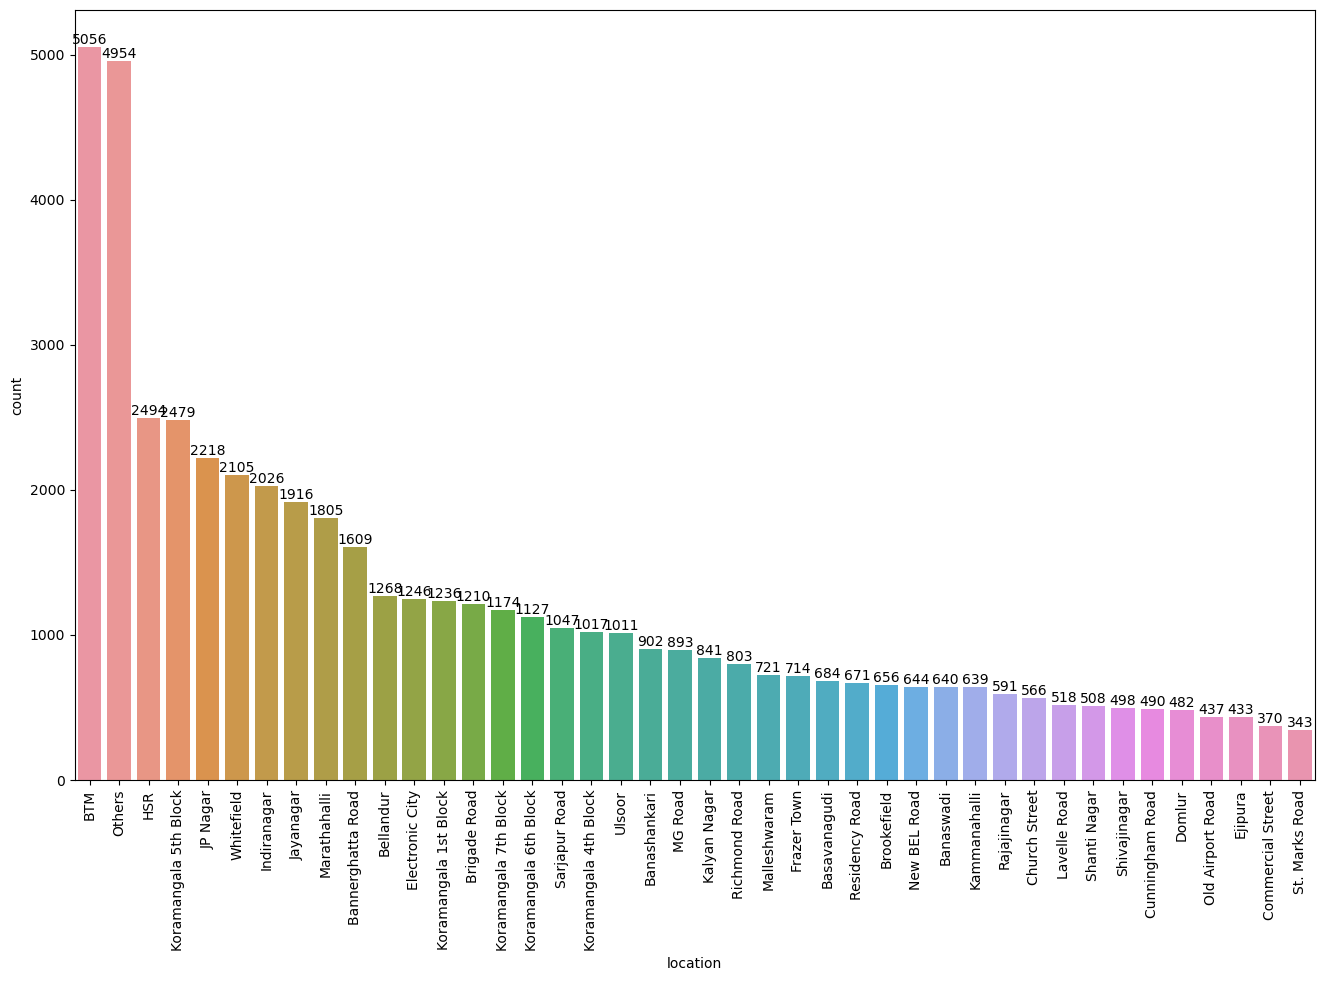

In [145]:
plt.figure(figsize=(16,10))
plt.xticks(rotation=90)
ax = sns.countplot(data=df,x='location',order=df['location'].value_counts().index,width=0.8)
abs_values = df['location'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.show()

The key business insight that we can attain from here that, it would be beneficial to open up an restaurant at
Old Airport Road / Ejipura / Commercial Street / St.Marks Road.


In [146]:
df.head(1)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_for_2,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet


## Top Cuisines

In [198]:
df1=df[['cuisines','votes']]
df1=df1.groupby(['cuisines'])['votes'].sum()
df1=df1.to_frame()
df1=df1.sort_values('votes',ascending = False)
df1=df1.iloc[1:]
df1

,votes
cuisines,
North Indian,516310
"North Indian, Chinese",258225
South Indian,161975
"North Indian, Mughlai",103706
Chinese,101728
Cafe,89986
"North Indian, South Indian",88925
Desserts,84323
"Chinese, Momos",82796


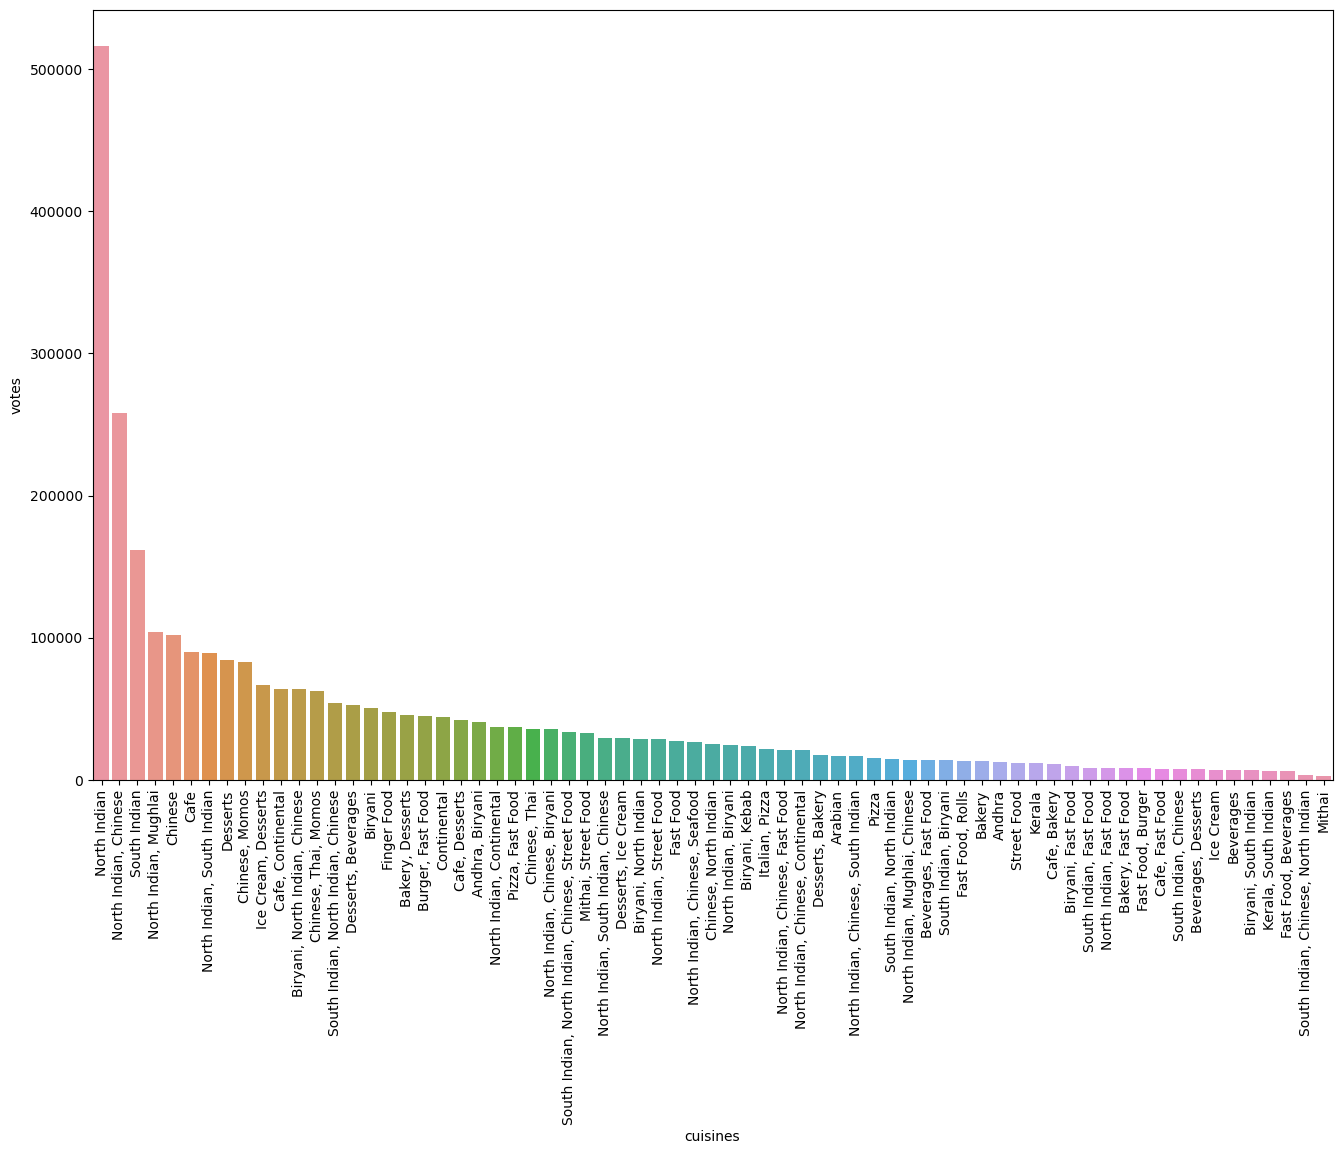

In [212]:
plt.figure(figsize=(16,10))
sns.barplot(x=df1.index,y=df1['votes'])
plt.xticks(rotation=90)
plt.show()

## Location based on votes

In [207]:
df2=df[['location','votes']]
df2=df2.groupby(['location'])['votes'].sum()
df2=df2.to_frame()
df2=df2.sort_values('votes',ascending=False)
df2.head(2)

,votes
location,
Koramangala 5th Block,2214083
Indiranagar,1165909


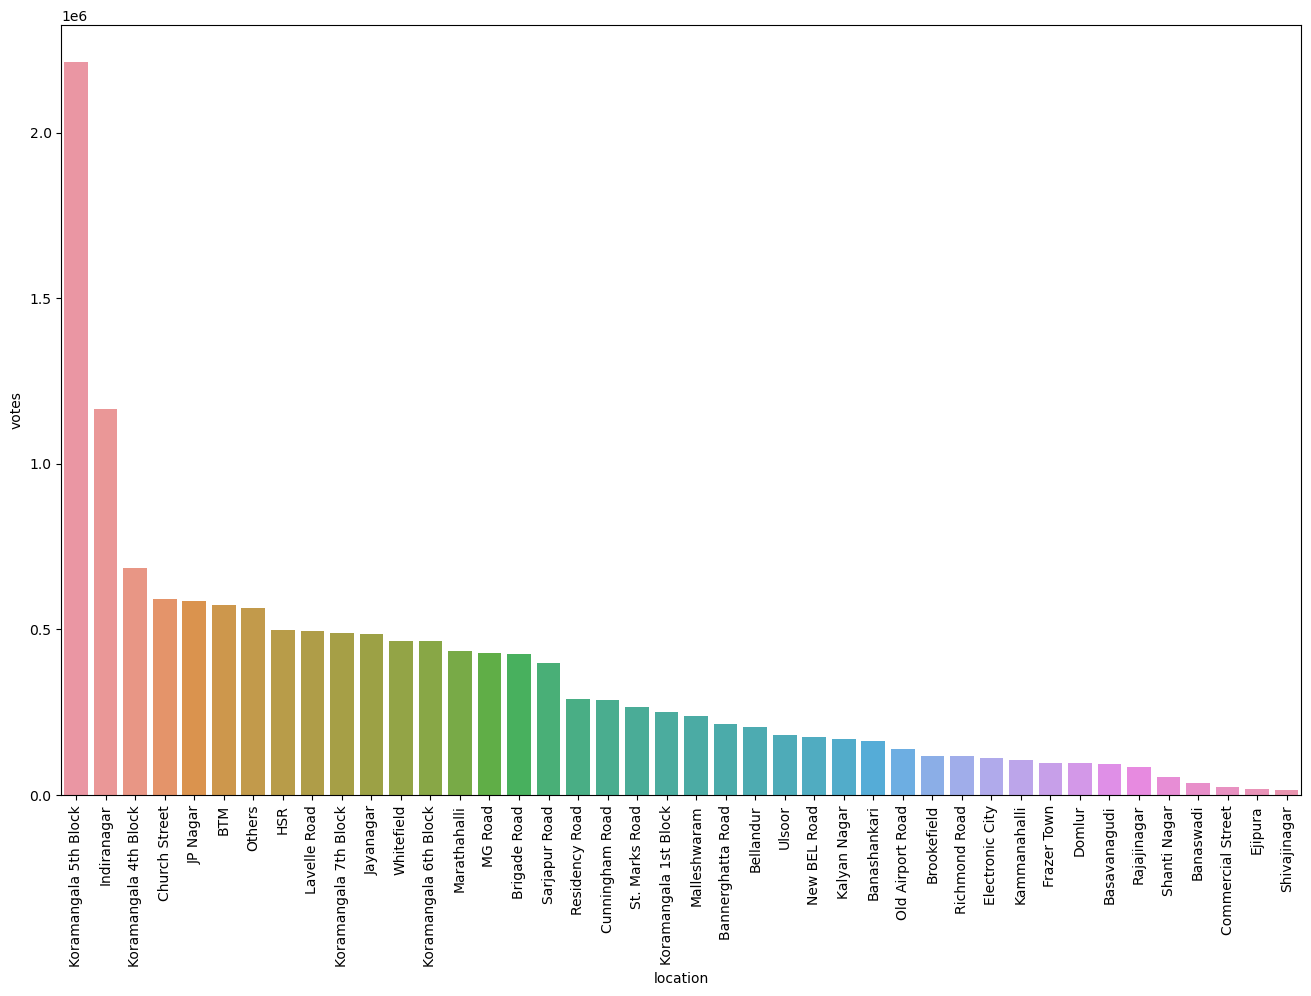

In [211]:
plt.figure(figsize=(16,10))
sns.barplot(x=df2.index,y=df2['votes'])
plt.xticks(rotation=90)
plt.show()

## Type Preferred

<Axes: xlabel='type', ylabel='rate'>

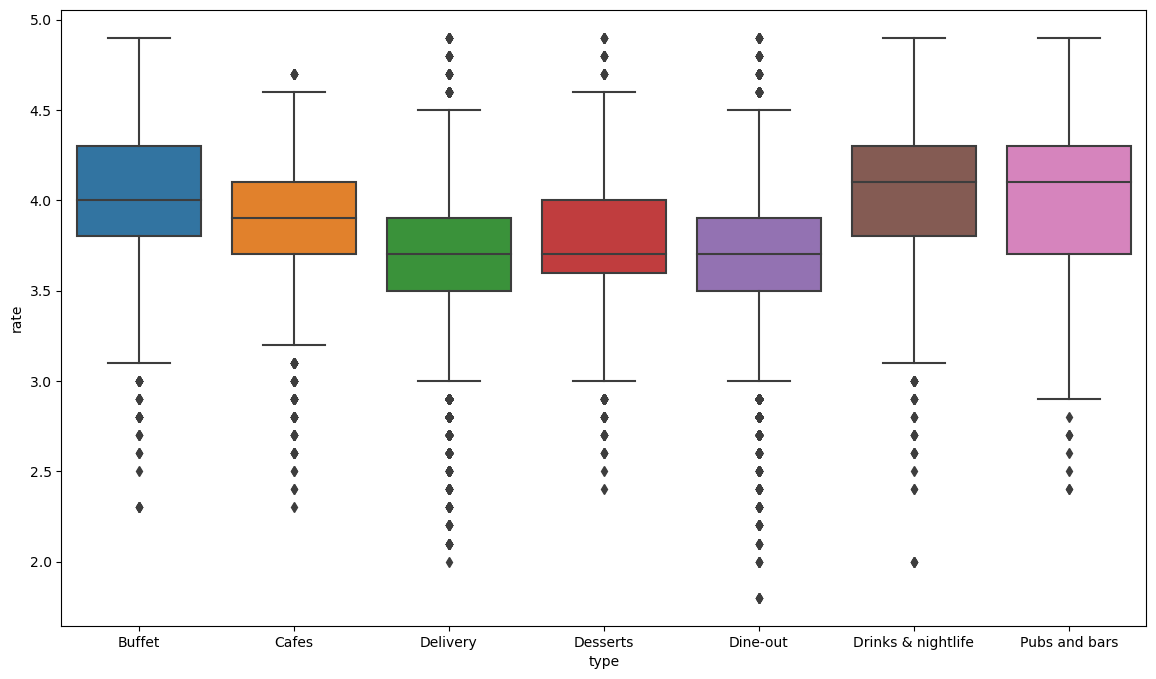

In [217]:
plt.figure(figsize=(14,8))
sns.boxplot(x='type',y='rate',data=df)

## Table Reservations

<Axes: xlabel='book_table', ylabel='count'>

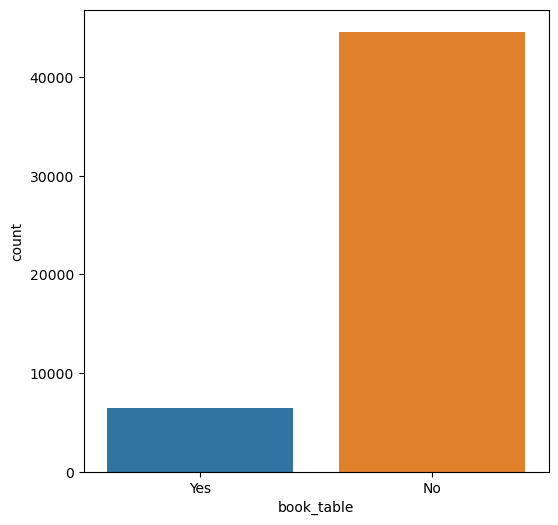

In [220]:
plt.figure(figsize=(6,6))
sns.countplot(data=df,x='book_table')

## Online Booking

<Axes: xlabel='online_order', ylabel='count'>

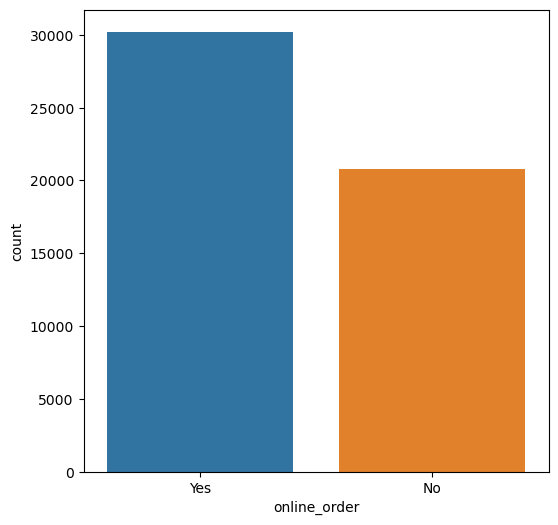

In [222]:
plt.figure(figsize=(6,6))
sns.countplot(data=df,x='online_order')